# Training on 2 classes (V5 dataset)

In this experiment, we trained on 2 classes, `all_off` (5), where all the communication is off, and `all_on` (6), where everything is on.

We tested in following conditions:

Number of test cases: 68 (34 from each class)

Locations
- Bathroom
- DormRoom1
- DormRoom2
- DormRoom3
- DormRoom4
- DormRoom5
- DormRoom6
- Kitchen1
- Kitchen2
- Kitchen3
- LivigRoom2
- LivingRoom1
- Park
- Restaurant

Communication modules (internal producers of electromagnetic emissions)
- wifi
- bluetooth
- mobile antenna

Traffic on

In [1]:
import os
import pandas as pd
import glob
import json
version = "v5"
dataset_path = f"../data/processed/"
filename = f"{version}-2_stages-full_statistical_with_window.csv"
filename2 = f"{version}-2_stages-fourier_window_big.csv"
filename3 = f"{version}-2_stages-fourier_normalized_int_XYZ.csv"

In [2]:
import csv
import pandas as pd

df = pd.read_csv(f"{dataset_path}/{filename}")
df


,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
0,0,LATERNAWithTraffic2_000,Restaurant,029a77f196804217,5,1000.0,32.37654,6.159823,7.62,34.020000,...,-0.900000,38.607984,1,2.988454,17.570596,0.123887,0.194630,0.222709,0.520518,124.607659
1,1,LATERNAWithTraffic2_001,Restaurant,029a77f196804217,5,1000.0,34.36920,0.447752,33.12,34.079998,...,-0.900000,38.607984,1,2.348688,15.367627,0.016290,0.058241,0.103125,0.267914,108.834361
2,2,LATERNAWithTraffic2_002,Restaurant,029a77f196804217,5,1000.0,34.31886,0.433351,33.12,34.020000,...,-0.900000,38.607984,1,2.359108,15.384415,0.014653,0.064039,0.105815,0.269367,108.960546
3,3,LATERNAWithTraffic2_003,Restaurant,029a77f196804217,5,1000.0,34.28556,0.438147,33.12,33.960000,...,-0.900000,38.607984,1,2.372398,15.407814,0.016998,0.078269,0.114059,0.280265,109.135575
4,4,LATERNAWithTraffic2_004,Restaurant,029a77f196804217,5,1000.0,34.26084,0.449255,32.76,33.960000,...,-0.900000,38.607984,1,2.373860,15.417774,0.017775,0.068422,0.111261,0.305817,109.206232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,671,spelaMilenkosRoomTrafficTable3_005,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87912,0.388812,-5.10,-4.140000,...,-96.299995,112.363976,1,7.393496,51.012672,0.011610,0.075226,0.124811,0.266794,360.891651
672,672,spelaMilenkosRoomTrafficTable3_006,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87624,0.380569,-5.10,-4.140000,...,-96.299995,112.363976,1,7.396722,51.024236,0.014966,0.072868,0.122709,0.299157,360.975023
673,673,spelaMilenkosRoomTrafficTable3_007,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87408,0.391281,-5.10,-4.140000,...,-96.299995,112.363976,1,7.394965,50.993828,0.013631,0.068642,0.124743,0.327989,360.762581
674,674,spelaMilenkosRoomTrafficTable3_008,DormRoom3,e08d976ac75c011e,6,1000.0,-3.85620,0.388581,-5.10,-4.140000,...,-96.299995,112.363976,1,7.392048,50.954352,0.015366,0.071047,0.114159,0.348142,360.485913


In [3]:
import csv
import pandas as pd

df_f = pd.read_csv(f"{dataset_path}/{filename2}")
df_f

,Unnamed: 0,name,location,device_id,label,1,2,3,4,5,...,41,42,43,44,45,46,47,48,49,50
0,0,LATERNAWithTraffic2_000,Restaurant,029a77f196804217,5,121.100560,6.312799,2.706040,2.555229,1.322195,...,0.130141,0.148300,0.134433,0.125507,0.116128,0.132109,0.115622,0.113349,0.105403,0.104297
1,1,LATERNAWithTraffic2_001,Restaurant,029a77f196804217,5,120.285898,7.234730,1.898696,2.998705,1.123582,...,0.151896,0.152574,0.148974,0.140587,0.140561,0.152706,0.134366,0.138558,0.135176,0.132545
2,2,LATERNAWithTraffic2_002,Restaurant,029a77f196804217,5,119.295022,7.926044,1.708508,2.626543,1.852330,...,0.135930,0.121960,0.137269,0.130854,0.150641,0.121066,0.129037,0.120758,0.124453,0.120136
3,3,LATERNAWithTraffic2_003,Restaurant,029a77f196804217,5,118.227067,8.240860,2.441177,1.532561,2.458682,...,0.153364,0.120233,0.157428,0.148213,0.154057,0.139036,0.139833,0.138810,0.130797,0.131372
4,4,LATERNAWithTraffic2_004,Restaurant,029a77f196804217,5,117.080056,8.154927,3.703195,0.942379,1.976951,...,0.146717,0.103951,0.153434,0.158026,0.131962,0.149576,0.130285,0.131980,0.132469,0.127399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,25737,spelaMilenkosRoomTrafficTable3_394,DormRoom3,e08d976ac75c011e,6,360.451236,0.409613,0.358197,0.415547,0.321003,...,0.076241,0.063529,0.052386,0.057157,0.032831,0.027539,0.038029,0.020357,0.014417,0.007451
25738,25738,spelaMilenkosRoomTrafficTable3_395,DormRoom3,e08d976ac75c011e,6,360.443707,0.414223,0.354113,0.415970,0.310258,...,0.076634,0.064143,0.053148,0.055866,0.035098,0.024716,0.038090,0.020986,0.012046,0.006563
25739,25739,spelaMilenkosRoomTrafficTable3_396,DormRoom3,e08d976ac75c011e,6,360.422738,0.436390,0.356295,0.419780,0.316700,...,0.077261,0.064220,0.055737,0.055496,0.037578,0.020855,0.040300,0.021850,0.012729,0.007455
25740,25740,spelaMilenkosRoomTrafficTable3_397,DormRoom3,e08d976ac75c011e,6,360.426058,0.432698,0.354572,0.419575,0.306600,...,0.076833,0.064219,0.054303,0.055642,0.032780,0.024571,0.037638,0.020527,0.014826,0.009319


In [4]:
import csv
import pandas as pd

df_f_norm = pd.read_csv(f"{dataset_path}/{filename3}")
df_f_norm

,Unnamed: 0,name,location,device_id,label,intensity_1,intensity_2,intensity_3,intensity_4,intensity_5,...,Z_41,Z_42,Z_43,Z_44,Z_45,Z_46,Z_47,Z_48,Z_49,Z_50
0,0,LATERNAWithTraffic2_000,Restaurant,029a77f196804217,5,7.470365,2.983096,1.278732,1.207467,0.624800,...,0.136108,0.096289,0.085358,0.086715,0.093671,0.063959,0.069161,0.066806,0.077327,0.070788
1,1,LATERNAWithTraffic2_001,Restaurant,029a77f196804217,5,6.932167,3.418753,0.897224,1.417030,0.530946,...,0.120129,0.090735,0.084263,0.064035,0.063160,0.081285,0.053997,0.051931,0.044170,0.045198
2,2,LATERNAWithTraffic2_002,Restaurant,029a77f196804217,5,6.296129,3.745431,0.807351,1.241166,0.875314,...,0.137018,0.119407,0.102829,0.082438,0.069137,0.084191,0.069214,0.072006,0.067250,0.063130
3,3,LATERNAWithTraffic2_003,Restaurant,029a77f196804217,5,5.625500,3.894197,1.153572,0.724208,1.161844,...,0.121788,0.117716,0.086604,0.075138,0.064997,0.057610,0.057262,0.053393,0.058720,0.054178
4,4,LATERNAWithTraffic2_004,Restaurant,029a77f196804217,5,4.917718,3.853589,1.749935,0.445318,0.934203,...,0.129110,0.131515,0.088830,0.082020,0.089999,0.069270,0.069778,0.064942,0.053228,0.055580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,25737,spelaMilenkosRoomTrafficTable3_394,DormRoom3,e08d976ac75c011e,6,1.448107,0.822474,0.719234,0.834389,0.644552,...,0.151905,0.124693,0.104593,0.116759,0.068790,0.055596,0.074826,0.040742,0.029499,0.015188
25738,25738,spelaMilenkosRoomTrafficTable3_395,DormRoom3,e08d976ac75c011e,6,1.442828,0.831731,0.711035,0.835240,0.622976,...,0.152489,0.126185,0.105716,0.113783,0.072710,0.048439,0.074840,0.042487,0.023915,0.012805
25739,25739,spelaMilenkosRoomTrafficTable3_396,DormRoom3,e08d976ac75c011e,6,1.433643,0.876241,0.715415,0.842888,0.635912,...,0.153551,0.125487,0.110652,0.112698,0.077612,0.040978,0.078803,0.043751,0.024963,0.014371
25740,25740,spelaMilenkosRoomTrafficTable3_397,DormRoom3,e08d976ac75c011e,6,1.434282,0.868828,0.711956,0.842478,0.615631,...,0.152873,0.125867,0.107482,0.113699,0.067130,0.049002,0.073902,0.041623,0.030393,0.019340


In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'location', 'device_id', 'label', 'count',
       'X_UnCal_mean', 'X_UnCal_std', 'X_UnCal_min', 'X_UnCal_25%',
       'X_UnCal_50%', 'X_UnCal_75%', 'X_UnCal_max', 'Y_UnCal_mean',
       'Y_UnCal_std', 'Y_UnCal_min', 'Y_UnCal_25%', 'Y_UnCal_50%',
       'Y_UnCal_75%', 'Y_UnCal_max', 'Z_UnCal_mean', 'Z_UnCal_std',
       'Z_UnCal_min', 'Z_UnCal_25%', 'Z_UnCal_50%', 'Z_UnCal_75%',
       'Z_UnCal_max', 'Intensity_mean', 'Intensity_std', 'Intensity_min',
       'Intensity_25%', 'Intensity_50%', 'Intensity_75%', 'Intensity_max',
       'X_Bias', 'Y_Bias', 'Z_Bias', 'Bias_Intensity', 'Accuracy',
       'fourier_mean', 'fourier_std', 'fourier_min', 'fourier_25%',
       'fourier_50%', 'fourier_75%', 'fourier_max'],
      dtype='object')

In [6]:
list(set([name[:-3] for name in df['name'].to_list()]))

['PiXmilenkosRoomTrafficTable5_',
 'PiXmilenkosRoomTrafficTable4_',
 'LATERNAWithTraffic2_',
 'PiXmilenkosRoomTrafficTable6_',
 'spelaMilenkosRoomTrafficTable1_',
 'PiXmilenkosRoomTrafficTable1_',
 'NadasKitchenWithTrafficOrient2_',
 'milenkosRoomTrafficBed3_',
 'NadasKitchenWithTrafficOrient3_',
 'milenkosRoomEithTrafficDifferentOrentationWithPousesInRuns3_',
 'NadasBathroomWithTrafficOrient1_',
 'NadasLivingRoomWithTrafficOrient2_',
 'PiXmilenkosRoomTrafficTable7_',
 'NadasKitchenWithTraffic_',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns_',
 'PiXmilenkosRoomTrafficTable3_',
 'milenkosRoomTrafficTable3_',
 'NadasLivingRoomWithTrafficOrient3_',
 'milenkosRoomTrafficBed1_',
 'milenkosRoomTrafficTable2_',
 'LATERNAWithTruffic_',
 'spelaMilenkosRoomTrafficTable2_',
 'spelaMilenkosKitchenTrafficTable4_',
 'spelaMilenkosKitchenTrafficTable2_',
 'MihasLivingRoom_',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns2_',
 'spelaMilenkosKitchenTrafficTable1_',
 'LATER

In [7]:
list(set(df['device_id'].to_list()))

['e08d976ac75c011e',
 '029a77f196804217',
 '4aaf95a621ccf092',
 '03575768cc23b2df']

# General feature selection
- corelation between feature and label
- 

In [8]:
correlation = df.iloc[:, 6:].apply(lambda x: df['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation

Y_UnCal_max       0.112520
fourier_75%       0.111725
Y_UnCal_75%       0.108621
Y_UnCal_mean      0.107608
Y_UnCal_50%       0.107584
Y_UnCal_25%       0.106881
Y_UnCal_min       0.103246
Intensity_min     0.101404
Intensity_25%     0.098206
Intensity_mean    0.097730
Intensity_50%     0.097213
Intensity_75%     0.096490
Intensity_max     0.096338
fourier_std       0.096161
fourier_max       0.096118
fourier_mean      0.092875
fourier_50%       0.087614
Intensity_std     0.076841
Y_UnCal_std       0.076505
fourier_25%       0.072649
X_UnCal_min       0.068176
Z_UnCal_max       0.066485
Z_UnCal_75%       0.063183
fourier_min       0.062552
Z_UnCal_mean      0.062117
Z_UnCal_25%       0.060995
Z_UnCal_50%       0.060371
X_UnCal_25%       0.060274
X_UnCal_mean      0.060221
Z_UnCal_min       0.060053
X_UnCal_max       0.059731
X_UnCal_75%       0.058986
X_UnCal_50%       0.058929
Z_UnCal_std       0.043800
X_UnCal_std       0.032822
X_Bias            0.017937
Y_Bias            0.010273
Z

In [9]:
# select features with correlation greater then 0.1
selection_general = correlation[correlation > 0.05].index
df[selection_general]

,Y_UnCal_max,fourier_75%,Y_UnCal_75%,Y_UnCal_mean,Y_UnCal_50%,Y_UnCal_25%,Y_UnCal_min,Intensity_min,Intensity_25%,Intensity_mean,...,fourier_min,Z_UnCal_mean,Z_UnCal_25%,Z_UnCal_50%,X_UnCal_25%,X_UnCal_mean,Z_UnCal_min,X_UnCal_max,X_UnCal_75%,X_UnCal_50%
0,7.860000,0.520518,-33.420000,-30.45228,-33.840000,-34.200000,-35.399998,31.474618,53.825048,52.437204,...,0.123887,-25.286160,-25.260000,-24.779999,34.020000,32.37654,-34.860000,35.76,34.739998,34.38
1,-32.280000,0.267914,-33.540000,-33.79596,-33.780000,-34.079998,-35.040000,51.812839,53.987715,54.237281,...,0.016290,-24.854340,-25.199999,-24.900000,34.079998,34.36920,-26.220000,35.76,34.680000,34.38
2,-32.700000,0.269367,-33.600000,-33.89034,-33.899998,-34.140000,-35.340000,51.991826,54.041050,54.284260,...,0.014653,-24.896820,-25.320000,-24.960000,34.020000,34.31886,-26.279999,35.64,34.620000,34.32
3,-32.700000,0.280265,-33.660000,-33.97206,-33.960000,-34.260000,-35.520000,51.325572,54.070436,54.337133,...,0.016998,-24.947040,-25.320000,-25.019999,33.960000,34.28556,-26.340000,35.52,34.559998,34.26
4,-32.219997,0.305817,-33.660000,-33.96462,-33.960000,-34.260000,-35.520000,51.325572,54.087761,54.349825,...,0.017775,-25.020060,-25.380000,-25.080000,33.960000,34.26084,-26.400000,35.52,34.559998,34.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,14.219999,0.266794,13.259999,13.00236,13.020000,12.780000,11.820000,178.609277,179.738320,180.053431,...,0.011610,-179.540637,-179.819990,-179.580000,-4.140000,-3.87912,-180.900000,-2.64,-3.660000,-3.90
672,14.160000,0.299157,13.259999,13.01154,13.020000,12.780000,11.820000,178.304202,179.730158,180.039145,...,0.014966,-179.525757,-179.879990,-179.519990,-4.140000,-3.87624,-180.720000,-2.64,-3.660000,-3.90
673,14.160000,0.327989,13.259999,13.01706,13.020000,12.780000,12.059999,178.304202,179.658130,179.967078,...,0.013631,-179.453097,-179.774997,-179.459990,-4.140000,-3.87408,-180.720000,-2.70,-3.600000,-3.84
674,14.219999,0.348142,13.259999,13.00824,13.020000,12.719999,11.940000,178.537741,179.608622,179.923292,...,0.015366,-179.410197,-179.700000,-179.400000,-4.140000,-3.85620,-181.200000,-2.76,-3.600000,-3.84


- apparently we need feature selection tailored to every phone / location

# One phone (Pixel, 03575768cc23b2df), one location, different rotations

In [10]:
dataset = 'PiXmilenkosRoomTrafficTable'
df_pixel_dorm = df[df['name'].str.contains(dataset)]
df_pixel_dorm

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
74,74,PiXmilenkosRoomTrafficTable1_000,DormRoom2,03575768cc23b2df,5,1000.0,-1.616073,1.481408,-13.297999,-2.366800,...,-28.653944,54.960808,1,3.839093,24.134021,0.195812,0.323566,0.388414,0.473740,171.075840
75,75,PiXmilenkosRoomTrafficTable1_001,DormRoom2,03575768cc23b2df,5,1000.0,-1.440210,1.128453,-7.417600,-2.138050,...,-28.653944,54.960808,1,3.797462,23.973361,0.236980,0.319277,0.398427,0.465315,169.922407
76,76,PiXmilenkosRoomTrafficTable1_002,DormRoom2,03575768cc23b2df,5,1000.0,-1.346563,1.051113,-4.697000,-2.052650,...,-28.653944,54.960808,1,3.726634,23.892441,0.240594,0.297922,0.327597,0.384072,169.292040
77,77,PiXmilenkosRoomTrafficTable1_003,DormRoom2,03575768cc23b2df,5,1000.0,-1.282208,1.052316,-4.428600,-2.028250,...,-28.653944,54.960808,1,3.722813,23.882508,0.185653,0.294875,0.346501,0.382938,169.219517
78,78,PiXmilenkosRoomTrafficTable1_004,DormRoom2,03575768cc23b2df,5,1000.0,-1.345721,1.150642,-6.771000,-2.049600,...,-28.653944,54.960808,1,3.727229,23.894307,0.159398,0.288825,0.351736,0.396753,169.305562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,483,PiXmilenkosRoomTrafficTable7_006,DormRoom2,03575768cc23b2df,6,1000.0,-25.072403,0.764905,-29.084799,-25.498000,...,-37.247314,65.262127,1,1.498495,9.204857,0.102664,0.160848,0.187893,0.227684,65.283685
484,484,PiXmilenkosRoomTrafficTable7_007,DormRoom2,03575768cc23b2df,6,1000.0,-26.061530,1.563489,-30.317000,-27.620800,...,-37.247314,65.262127,1,1.560170,9.504054,0.134887,0.166468,0.193715,0.242913,67.417242
485,485,PiXmilenkosRoomTrafficTable7_008,DormRoom2,03575768cc23b2df,6,1000.0,-26.162619,1.526563,-32.464200,-27.633000,...,-37.247314,65.262127,1,1.576963,9.521007,0.111854,0.152295,0.205495,0.285424,67.549861
486,486,PiXmilenkosRoomTrafficTable7_009,DormRoom2,03575768cc23b2df,6,1000.0,-25.198368,0.803402,-32.464200,-25.595600,...,-37.247314,65.262127,1,1.520721,9.251726,0.118287,0.146333,0.183104,0.252648,65.628832


In [11]:
correlation_pixel_dorm = df_pixel_dorm.iloc[:, 6:].apply(lambda x: df_pixel_dorm['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation_pixel_dorm

fourier_50%       0.328099
fourier_25%       0.324922
fourier_min       0.311024
fourier_75%       0.305893
X_UnCal_50%       0.210633
X_UnCal_75%       0.207831
X_UnCal_max       0.202905
X_UnCal_mean      0.201601
X_UnCal_25%       0.198021
X_UnCal_min       0.154332
X_Bias            0.124964
Bias_Intensity    0.124964
Z_Bias            0.124964
Y_Bias            0.124964
Intensity_min     0.084302
Z_UnCal_50%       0.082753
Z_UnCal_75%       0.079646
Z_UnCal_min       0.075815
Intensity_std     0.075381
Z_UnCal_mean      0.073559
Z_UnCal_25%       0.071604
Intensity_mean    0.050494
Intensity_25%     0.050226
Intensity_50%     0.047683
Y_UnCal_std       0.040853
fourier_std       0.039765
fourier_max       0.038758
Intensity_75%     0.037441
Intensity_max     0.036480
Z_UnCal_max       0.025670
Y_UnCal_min       0.020367
Y_UnCal_50%       0.019441
Y_UnCal_75%       0.018099
Y_UnCal_mean      0.017386
Y_UnCal_25%       0.017333
fourier_mean      0.014297
Y_UnCal_max       0.007552
Z

In [12]:
# select features with correlation greater then 0.3
selection_dorm = correlation_pixel_dorm[correlation_pixel_dorm > 0.30].index
df_pixel_dorm[selection_dorm]

,fourier_50%,fourier_25%,fourier_min,fourier_75%
74,0.388414,0.323566,0.195812,0.473740
75,0.398427,0.319277,0.236980,0.465315
76,0.327597,0.297922,0.240594,0.384072
77,0.346501,0.294875,0.185653,0.382938
78,0.351736,0.288825,0.159398,0.396753
...,...,...,...,...
483,0.187893,0.160848,0.102664,0.227684
484,0.193715,0.166468,0.134887,0.242913
485,0.205495,0.152295,0.111854,0.285424
486,0.183104,0.146333,0.118287,0.252648


In [13]:
 
test_case = 'PiXmilenkosRoomTrafficTable5'
test = df_pixel_dorm[df_pixel_dorm['name'].str.contains(test_case)]
train = df_pixel_dorm[~df_pixel_dorm['name'].str.contains(test_case)]
test

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
114,114,PiXmilenkosRoomTrafficTable5_000,DormRoom2,03575768cc23b2df,5,1000.0,8.546295,1.298563,-4.611600,7.83240,...,-28.653944,54.960808,1,3.814114,24.570536,0.215535,0.296261,0.335125,0.381104,174.078497
115,115,PiXmilenkosRoomTrafficTable5_001,DormRoom2,03575768cc23b2df,5,1000.0,8.574367,1.249737,4.038200,7.89340,...,-28.653944,54.960808,1,4.011321,24.591499,0.288592,0.391851,0.479009,0.625089,174.412973
116,116,PiXmilenkosRoomTrafficTable5_002,DormRoom2,03575768cc23b2df,5,1000.0,8.572915,1.315068,3.269600,7.91780,...,-28.653944,54.960808,1,4.027037,24.584830,0.233515,0.414375,0.491022,0.635223,174.382366
117,117,PiXmilenkosRoomTrafficTable5_003,DormRoom2,03575768cc23b2df,5,1000.0,8.676725,1.199923,3.269600,8.01540,...,-28.653944,54.960808,1,3.931303,24.560543,0.298963,0.357331,0.408374,0.490864,174.123062
118,118,PiXmilenkosRoomTrafficTable5_004,DormRoom2,03575768cc23b2df,5,1000.0,8.743898,1.146265,4.392000,8.05200,...,-28.653944,54.960808,1,3.889040,24.554371,0.240919,0.321821,0.375948,0.493701,174.039184
119,119,PiXmilenkosRoomTrafficTable5_005,DormRoom2,03575768cc23b2df,5,1000.0,8.740726,1.127264,4.489600,7.95440,...,-28.653944,54.960808,1,3.814271,24.535310,0.188216,0.296260,0.342439,0.367869,173.834518
120,120,PiXmilenkosRoomTrafficTable5_006,DormRoom2,03575768cc23b2df,5,1000.0,8.725184,1.083368,4.489600,7.97880,...,-28.653944,54.960808,1,3.810530,24.541023,0.226321,0.285171,0.337401,0.378628,173.870401
121,121,PiXmilenkosRoomTrafficTable5_007,DormRoom2,03575768cc23b2df,5,1000.0,8.812450,1.030287,5.660800,8.10080,...,-28.653944,54.960808,1,3.767644,24.492046,0.194023,0.250925,0.292555,0.344352,173.488197
122,122,PiXmilenkosRoomTrafficTable5_008,DormRoom2,03575768cc23b2df,5,1000.0,8.799213,1.044181,5.660800,8.07640,...,-28.653944,54.960808,1,3.768270,24.474084,0.230996,0.267079,0.306931,0.342602,173.364592
123,123,PiXmilenkosRoomTrafficTable5_009,DormRoom2,03575768cc23b2df,5,1000.0,8.743825,1.054995,5.917000,8.02760,...,-28.653944,54.960808,1,3.759706,24.466396,0.204870,0.266062,0.302487,0.331321,173.302834


In [14]:
y_test = test['label'].to_numpy()
X_test = test[selection_dorm].to_numpy()
y_train = train['label'].to_numpy()
X_train = train[selection_dorm].to_numpy()


## SVM

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

print(y_train.shape)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

(127,)
0.6666666666666666


,all_off_predicted,all_on_predicted
all_off,6,4
all_on,3,8


## RF

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

0.7619047619047619


,all_off_predicted,all_on_predicted
all_off,6,4
all_on,1,10


# One phone (Pixel, 03575768cc23b2df), different locations
- test on one location
- train on all other locations


In [17]:
device_id = '03575768cc23b2df'
df_pixel = df[df['device_id'] == device_id]
df_pixel

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
74,74,PiXmilenkosRoomTrafficTable1_000,DormRoom2,03575768cc23b2df,5,1000.0,-1.616073,1.481408,-13.297999,-2.366800,...,-28.653944,54.960808,1,3.839093,24.134021,0.195812,0.323566,0.388414,0.473740,171.075840
75,75,PiXmilenkosRoomTrafficTable1_001,DormRoom2,03575768cc23b2df,5,1000.0,-1.440210,1.128453,-7.417600,-2.138050,...,-28.653944,54.960808,1,3.797462,23.973361,0.236980,0.319277,0.398427,0.465315,169.922407
76,76,PiXmilenkosRoomTrafficTable1_002,DormRoom2,03575768cc23b2df,5,1000.0,-1.346563,1.051113,-4.697000,-2.052650,...,-28.653944,54.960808,1,3.726634,23.892441,0.240594,0.297922,0.327597,0.384072,169.292040
77,77,PiXmilenkosRoomTrafficTable1_003,DormRoom2,03575768cc23b2df,5,1000.0,-1.282208,1.052316,-4.428600,-2.028250,...,-28.653944,54.960808,1,3.722813,23.882508,0.185653,0.294875,0.346501,0.382938,169.219517
78,78,PiXmilenkosRoomTrafficTable1_004,DormRoom2,03575768cc23b2df,5,1000.0,-1.345721,1.150642,-6.771000,-2.049600,...,-28.653944,54.960808,1,3.727229,23.894307,0.159398,0.288825,0.351736,0.396753,169.305562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,573,milenkosRoomTrafficTable_005,DormRoom2,03575768cc23b2df,6,1000.0,18.407494,0.883179,12.956400,17.934000,...,-28.653944,54.960808,1,3.912348,25.335759,0.211502,0.283305,0.323165,0.376317,179.479723
574,574,milenkosRoomTrafficTable_006,DormRoom2,03575768cc23b2df,6,1000.0,18.670514,0.783783,14.652200,18.214600,...,-28.653944,54.960808,1,3.875543,25.301397,0.184757,0.254022,0.301300,0.336249,179.204882
575,575,milenkosRoomTrafficTable_007,DormRoom2,03575768cc23b2df,6,1000.0,18.577050,0.926018,14.737599,18.153599,...,-28.653944,54.960808,1,4.001066,25.355300,0.179577,0.325835,0.395968,0.470806,179.701202
576,576,milenkosRoomTrafficTable_008,DormRoom2,03575768cc23b2df,6,1000.0,18.387279,1.147467,12.663600,17.958399,...,-28.653944,54.960808,1,4.064183,25.388414,0.298097,0.383568,0.442667,0.543145,179.993822


In [18]:
correlation_pixel = df_pixel.iloc[:, 6:].apply(lambda x: df_pixel['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation_pixel

fourier_50%       0.332267
fourier_25%       0.315435
fourier_75%       0.305924
fourier_min       0.287311
X_UnCal_50%       0.253862
X_UnCal_75%       0.250608
X_UnCal_max       0.249772
X_UnCal_mean      0.245590
X_UnCal_25%       0.242705
X_UnCal_min       0.192490
Bias_Intensity    0.104152
X_Bias            0.104152
Y_Bias            0.104152
Z_Bias            0.104152
Intensity_std     0.072529
Y_UnCal_max       0.071715
Y_UnCal_mean      0.061200
Y_UnCal_25%       0.061117
Y_UnCal_75%       0.060720
Y_UnCal_50%       0.059487
Y_UnCal_min       0.055738
Intensity_min     0.050871
Z_UnCal_50%       0.049925
Z_UnCal_min       0.049038
Z_UnCal_75%       0.046741
fourier_mean      0.046668
Z_UnCal_mean      0.041290
Z_UnCal_25%       0.039607
Y_UnCal_std       0.027896
Intensity_25%     0.017880
Intensity_mean    0.017632
Intensity_50%     0.015502
Intensity_max     0.007038
Z_UnCal_max       0.006349
fourier_std       0.006267
Intensity_75%     0.005709
Z_UnCal_std       0.005292
f

In [19]:
selection_pixel = correlation_pixel[correlation_pixel > 0.3].index
df_pixel[selection_pixel]

,fourier_50%,fourier_25%,fourier_75%
74,0.388414,0.323566,0.473740
75,0.398427,0.319277,0.465315
76,0.327597,0.297922,0.384072
77,0.346501,0.294875,0.382938
78,0.351736,0.288825,0.396753
...,...,...,...
573,0.323165,0.283305,0.376317
574,0.301300,0.254022,0.336249
575,0.395968,0.325835,0.470806
576,0.442667,0.383568,0.543145


In [20]:
# test_case = 'milenkosRoomTrafficTable'
test_case = 'PiXmilenkosRoomTrafficTable'
test = df[df['name'].str.contains(test_case)]
train = df[~df['name'].str.contains(test_case)]

y_test = test['label'].to_numpy()
X_test = test[selection_pixel].to_numpy()
y_train = train['label'].to_numpy()
X_train = train[selection_pixel].to_numpy()


## SVM

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

print(y_train.shape)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

(528,)
0.7094594594594594


,all_off_predicted,all_on_predicted
all_off,58,16
all_on,27,47


## RF

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

0.6824324324324325


,all_off_predicted,all_on_predicted
all_off,53,21
all_on,26,48


# Different phones

In [23]:
df['Pixel6'] = (df['device_id'] == "03575768cc23b2df").replace({True: 1, False: 0})
df['RedmiNote8Pro'] = (df['device_id'] == "4aaf95a621ccf092").replace({True: 1, False: 0})
df['GalaxyA51'] = (df['device_id'] == "029a77f196804217").replace({True: 1, False: 0})
df['GalaxyS6'] = (df['device_id'] == "e08d976ac75c011e").replace({True: 1, False: 0})
df

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max,Pixel6,RedmiNote8Pro,GalaxyA51,GalaxyS6
0,0,LATERNAWithTraffic2_000,Restaurant,029a77f196804217,5,1000.0,32.37654,6.159823,7.62,34.020000,...,17.570596,0.123887,0.194630,0.222709,0.520518,124.607659,0,0,1,0
1,1,LATERNAWithTraffic2_001,Restaurant,029a77f196804217,5,1000.0,34.36920,0.447752,33.12,34.079998,...,15.367627,0.016290,0.058241,0.103125,0.267914,108.834361,0,0,1,0
2,2,LATERNAWithTraffic2_002,Restaurant,029a77f196804217,5,1000.0,34.31886,0.433351,33.12,34.020000,...,15.384415,0.014653,0.064039,0.105815,0.269367,108.960546,0,0,1,0
3,3,LATERNAWithTraffic2_003,Restaurant,029a77f196804217,5,1000.0,34.28556,0.438147,33.12,33.960000,...,15.407814,0.016998,0.078269,0.114059,0.280265,109.135575,0,0,1,0
4,4,LATERNAWithTraffic2_004,Restaurant,029a77f196804217,5,1000.0,34.26084,0.449255,32.76,33.960000,...,15.417774,0.017775,0.068422,0.111261,0.305817,109.206232,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,671,spelaMilenkosRoomTrafficTable3_005,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87912,0.388812,-5.10,-4.140000,...,51.012672,0.011610,0.075226,0.124811,0.266794,360.891651,0,0,0,1
672,672,spelaMilenkosRoomTrafficTable3_006,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87624,0.380569,-5.10,-4.140000,...,51.024236,0.014966,0.072868,0.122709,0.299157,360.975023,0,0,0,1
673,673,spelaMilenkosRoomTrafficTable3_007,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87408,0.391281,-5.10,-4.140000,...,50.993828,0.013631,0.068642,0.124743,0.327989,360.762581,0,0,0,1
674,674,spelaMilenkosRoomTrafficTable3_008,DormRoom3,e08d976ac75c011e,6,1000.0,-3.85620,0.388581,-5.10,-4.140000,...,50.954352,0.015366,0.071047,0.114159,0.348142,360.485913,0,0,0,1


In [24]:
correlation_all = df.iloc[:, 6:].apply(lambda x: df['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation_all

Y_UnCal_max       0.112520
fourier_75%       0.111725
Y_UnCal_75%       0.108621
Y_UnCal_mean      0.107608
Y_UnCal_50%       0.107584
Y_UnCal_25%       0.106881
Y_UnCal_min       0.103246
Intensity_min     0.101404
Intensity_25%     0.098206
Intensity_mean    0.097730
Intensity_50%     0.097213
Intensity_75%     0.096490
Intensity_max     0.096338
fourier_std       0.096161
fourier_max       0.096118
fourier_mean      0.092875
fourier_50%       0.087614
Intensity_std     0.076841
Y_UnCal_std       0.076505
fourier_25%       0.072649
X_UnCal_min       0.068176
Z_UnCal_max       0.066485
Z_UnCal_75%       0.063183
fourier_min       0.062552
Z_UnCal_mean      0.062117
Z_UnCal_25%       0.060995
Z_UnCal_50%       0.060371
X_UnCal_25%       0.060274
X_UnCal_mean      0.060221
Z_UnCal_min       0.060053
X_UnCal_max       0.059731
X_UnCal_75%       0.058986
X_UnCal_50%       0.058929
Z_UnCal_std       0.043800
X_UnCal_std       0.032822
X_Bias            0.017937
RedmiNote8Pro     0.013870
Y

In [25]:
selection_all = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min', 'Pixel6', 'GalaxyS6', 'GalaxyA51', 'RedmiNote8Pro']
selection_best = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']

In [26]:
test_case = 'NadasLivingRoomWithTraffic'
#test_case = 'PiXmilenkosRoomTrafficTable'
test = df[df['name'].str.contains(test_case)]
train = df[~df['name'].str.contains(test_case)]

y_test = test['label'].to_numpy()
X_test = test[selection_best].to_numpy()
y_train = train['label'].to_numpy()
X_train = train[selection_best].to_numpy()

## SVM

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

print(y_train.shape)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

(651,)
0.48


,all_off_predicted,all_on_predicted
all_off,12,0
all_on,13,0


## RF

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

0.6


,all_off_predicted,all_on_predicted
all_off,12,0
all_on,10,3


# All phones, all locations averaging

In [29]:
selection_all = correlation_all[correlation_all > 0.1].index
selection_all

Index(['Y_UnCal_max', 'fourier_75%', 'Y_UnCal_75%', 'Y_UnCal_mean',
       'Y_UnCal_50%', 'Y_UnCal_25%', 'Y_UnCal_min', 'Intensity_min'],
      dtype='object')

In [30]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in df['name'].to_list()])):

    # test is one session, train the rest
    test = df[df['name'].str.contains(test_case)]
    train = df[~df['name'].str.contains(test_case)]

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['PiXmilenkosRoomTrafficTable5_', 0.7142857142857143, 0.7619047619047619]
['PiXmilenkosRoomTrafficTable4_', 0.7, 0.7]
['LATERNAWithTraffic2_', 0.5357142857142857, 0.5]
['PiXmilenkosRoomTrafficTable6_', 0.5238095238095238, 0.5238095238095238]
['spelaMilenkosRoomTrafficTable1_', 0.5, 0.7]
['PiXmilenkosRoomTrafficTable1_', 0.7, 0.7]
['NadasKitchenWithTrafficOrient2_', 0.4444444444444444, 0.6666666666666666]
['milenkosRoomTrafficBed3_', 0.5, 0.7857142857142857]
['NadasKitchenWithTrafficOrient3_', 0.5, 0.625]
['milenkosRoomEithTrafficDifferentOrentationWithPousesInRuns3_', 0.5, 0.14285714285714285]
['NadasBathroomWithTrafficOrient1_', 0.5, 0.75]
['NadasLivingRoomWithTrafficOrient2_', 0.4444444444444444, 0.5555555555555556]
['PiXmilenkosRoomTrafficTable7_', 0.52, 0.4]
['NadasKitchenWithTraffic_', 0.4444444444444444, 0.4444444444444444]
['milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns_', 0.5, 0.32142857142857145]
['PiXmilenkosRoomTrafficTable3_', 0.6190476190476191, 0.714285714285

,Test case,SVM,RF
0,PiXmilenkosRoomTrafficTable5_,0.714286,0.761905
1,PiXmilenkosRoomTrafficTable4_,0.700000,0.700000
2,LATERNAWithTraffic2_,0.535714,0.500000
3,PiXmilenkosRoomTrafficTable6_,0.523810,0.523810
4,spelaMilenkosRoomTrafficTable1_,0.500000,0.700000
5,PiXmilenkosRoomTrafficTable1_,0.700000,0.700000
6,NadasKitchenWithTrafficOrient2_,0.444444,0.666667
7,milenkosRoomTrafficBed3_,0.500000,0.785714
8,NadasKitchenWithTrafficOrient3_,0.500000,0.625000
9,milenkosRoomEithTrafficDifferentOrentationWith...,0.500000,0.142857


In [31]:
results_all.mean()

/tmp/ipykernel_4766/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.538673
RF     0.575310
dtype: float64

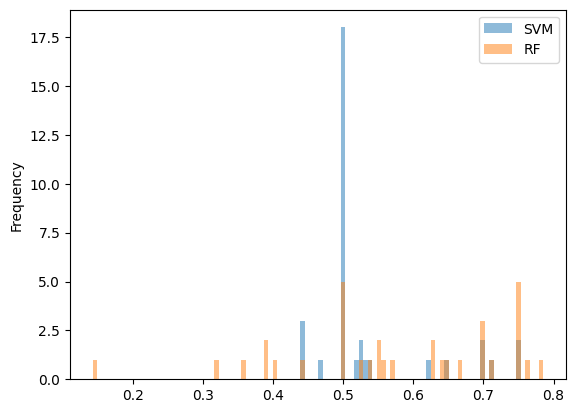

In [32]:
ax = results_all.plot.hist(bins=100, alpha=0.5)

# Pixel and Redmi Note 8 Pro, all locations, averaging
- both phones had some test cases in multiple orientations

In [33]:
#Pixel6
#RedmiNote8Pro
#GalaxyA51
#GalaxyS6

In [34]:
df_pixel_redmi = df[(df['Pixel6'] + df['RedmiNote8Pro']) == 1]

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df_pixel_redmi
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in df_test['name'].to_list()])):

    # test is one session, train the rest
    test = df_test[df_test['name'].str.contains(test_case)]
    train = df_test[~df_test['name'].str.contains(test_case)]

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['PiXmilenkosRoomTrafficTable5_', 0.6666666666666666, 0.7619047619047619]
['PiXmilenkosRoomTrafficTable4_', 0.7, 0.75]
['NadasLivingRoomWithTrafficOrient3_', 0.5, 0.875]
['PiXmilenkosRoomTrafficTable2_', 0.7, 0.75]
['milenkosRoomTrafficTable2_', 0.65, 0.75]
['milenkosRoomTrafficTable_', 0.7, 0.75]
['PiXmilenkosRoomTrafficTable6_', 0.5238095238095238, 0.5238095238095238]
['PiXmilenkosRoomTrafficTable1_', 0.75, 0.7]
['MihasLivingRoom_', 0.5, 0.875]
['NadasBathroomWithTrafficOrient1_', 0.5, 1.0]
['NadasKitchenWithTrafficOrient2_', 0.4444444444444444, 0.6666666666666666]
['NadasLivingRoomWithTrafficOrient2_', 0.4444444444444444, 0.5555555555555556]
['PiXmilenkosRoomTrafficTable7_', 0.16, 0.52]
['NadasKitchenWithTrafficOrient3_', 0.5, 0.75]
['NadasKitchenWithTraffic_', 0.4444444444444444, 1.0]
['NadasLivingRoomWithTraffic_', 0.5, 0.625]
['PiXmilenkosRoomTrafficTable3_', 0.6190476190476191, 0.7619047619047619]


,Test case,SVM,RF
0,PiXmilenkosRoomTrafficTable5_,0.666667,0.761905
1,PiXmilenkosRoomTrafficTable4_,0.700000,0.750000
2,NadasLivingRoomWithTrafficOrient3_,0.500000,0.875000
3,PiXmilenkosRoomTrafficTable2_,0.700000,0.750000
4,milenkosRoomTrafficTable2_,0.650000,0.750000
5,milenkosRoomTrafficTable_,0.700000,0.750000
6,PiXmilenkosRoomTrafficTable6_,0.523810,0.523810
7,PiXmilenkosRoomTrafficTable1_,0.750000,0.700000
8,MihasLivingRoom_,0.500000,0.875000
9,NadasBathroomWithTrafficOrient1_,0.500000,1.000000


In [36]:
results_all.mean()

/tmp/ipykernel_4766/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.547227
RF     0.742049
dtype: float64

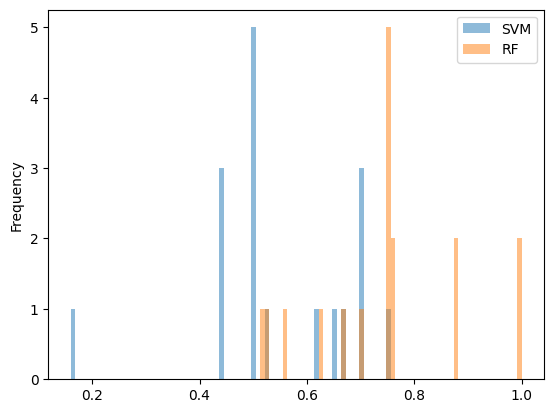

In [37]:
ax = results_all.plot.hist(bins=100, alpha=0.5)

# Pixel, all locations, averaging

In [38]:
#Pixel6
#RedmiNote8Pro
#GalaxyA51
#GalaxyS6

In [39]:
df_pixel = df[df['Pixel6'] == 1]

In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df_pixel
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in df_test['name'].to_list()])):

    # test is one session, train the rest
    test = df_test[df_test['name'].str.contains(test_case)]
    train = df_test[~df_test['name'].str.contains(test_case)]

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['PiXmilenkosRoomTrafficTable5_', 0.7142857142857143, 0.7619047619047619]
['PiXmilenkosRoomTrafficTable4_', 0.7, 0.8]
['milenkosRoomTrafficTable2_', 0.7, 0.8]
['PiXmilenkosRoomTrafficTable2_', 0.75, 0.9]
['milenkosRoomTrafficTable_', 0.75, 0.9]
['PiXmilenkosRoomTrafficTable6_', 0.38095238095238093, 0.47619047619047616]
['PiXmilenkosRoomTrafficTable1_', 0.7, 0.7]
['PiXmilenkosRoomTrafficTable7_', 0.16, 0.4]
['PiXmilenkosRoomTrafficTable3_', 0.6666666666666666, 0.6666666666666666]


,Test case,SVM,RF
0,PiXmilenkosRoomTrafficTable5_,0.714286,0.761905
1,PiXmilenkosRoomTrafficTable4_,0.700000,0.800000
2,milenkosRoomTrafficTable2_,0.700000,0.800000
3,PiXmilenkosRoomTrafficTable2_,0.750000,0.900000
4,milenkosRoomTrafficTable_,0.750000,0.900000
5,PiXmilenkosRoomTrafficTable6_,0.380952,0.476190
6,PiXmilenkosRoomTrafficTable1_,0.700000,0.700000
7,PiXmilenkosRoomTrafficTable7_,0.160000,0.400000
8,PiXmilenkosRoomTrafficTable3_,0.666667,0.666667


In [41]:
results_all.mean()

/tmp/ipykernel_4766/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.613545
RF     0.711640
dtype: float64

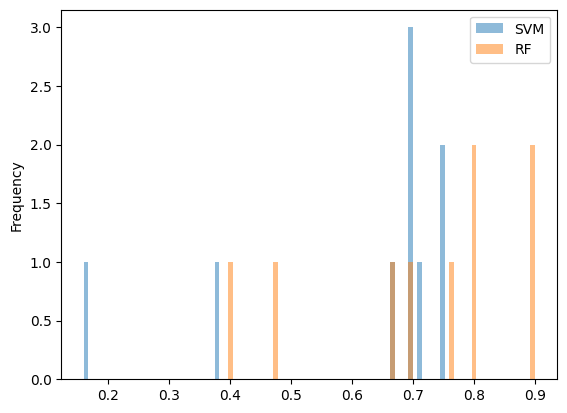

In [42]:
ax = results_all.plot.hist(bins=100, alpha=0.5)

# RedmiNote8Pro from pixel

In [43]:
#Pixel6
#RedmiNote8Pro
#GalaxyA51
#GalaxyS6

In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df
test_df = df_test[df_test['RedmiNote8Pro'] == 1]
train_df = df_test[df_test['Pixel6'] == 1]
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in test_df['name'].to_list()])):

    # test is one session, train the rest
    test = df_test[df_test['name'].str.contains(test_case)]
    train = train_df

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['NadasLivingRoomWithTrafficOrient3_', 0.5, 0.5]
['MihasLivingRoom_', 0.5, 0.5]
['NadasBathroomWithTrafficOrient1_', 0.5, 0.5]
['NadasKitchenWithTrafficOrient2_', 0.4444444444444444, 0.4444444444444444]
['NadasLivingRoomWithTrafficOrient2_', 0.4444444444444444, 0.4444444444444444]
['NadasKitchenWithTrafficOrient3_', 0.5, 0.5]
['NadasKitchenWithTraffic_', 0.4444444444444444, 0.4444444444444444]
['NadasLivingRoomWithTraffic_', 0.5, 0.5]


,Test case,SVM,RF
0,NadasLivingRoomWithTrafficOrient3_,0.500000,0.500000
1,MihasLivingRoom_,0.500000,0.500000
2,NadasBathroomWithTrafficOrient1_,0.500000,0.500000
3,NadasKitchenWithTrafficOrient2_,0.444444,0.444444
4,NadasLivingRoomWithTrafficOrient2_,0.444444,0.444444
5,NadasKitchenWithTrafficOrient3_,0.500000,0.500000
6,NadasKitchenWithTraffic_,0.444444,0.444444
7,NadasLivingRoomWithTraffic_,0.500000,0.500000


In [45]:
results_all.mean()

/tmp/ipykernel_4766/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.479167
RF     0.479167
dtype: float64

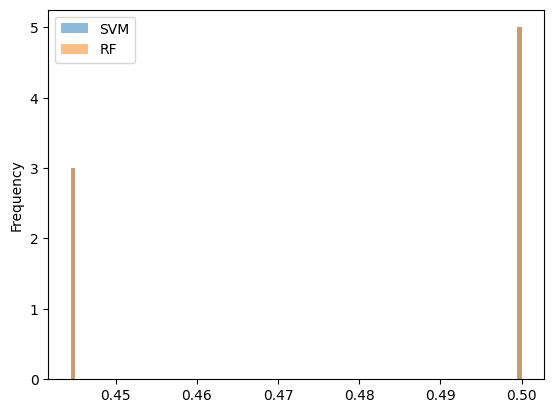

In [46]:
ax = results_all.plot.hist(bins=100, alpha=0.5)

# Redmi on fourier dataset, new location

In [89]:
#Pixel6: 03575768cc23b2df
#RedmiNote8Pro: 4aaf95a621ccf092
#GalaxyA51: 029a77f196804217
#GalaxyS6: e08d976ac75c011e

device_id = '4aaf95a621ccf092'
#df_f_pixel = df_f_norm[df_f_norm['device_id'].isin(['e08d976ac75c011e', '029a77f196804217'])]
df_f_pixel = df_f_norm

In [90]:
list(set(df_f_pixel['name']))

['spelaMilenkosKitchenTrafficTable1_360',
 'spelaMilenkosKitchenTrafficTable3_139',
 'PiXmilenkosRoomTrafficTable4_245',
 'spelaMilenkosRoomTrafficTable2_081',
 'milenkosRoomTrafficTable2_396',
 'milenkosRoomTrafficBed2_233',
 'milenkosRoomTrafficBed3_267',
 'milenkosRoomTrafficTable3_454',
 'PiXmilenkosRoomTrafficTable7_502',
 'NadasLivingRoomWithTrafficOrient3_028',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns2_186',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns_442',
 'LATERNAWithTruffic_334',
 'milenkosRoomTrafficBed1_111',
 'LATERNAresorantWithTrafic_510',
 'PiXmilenkosRoomTrafficTable6_058',
 'spelaMilenkosKitchenTrafficTable1_414',
 'spelaMilenkosKitchenTrafficTable2_296',
 'PiXmilenkosRoomTrafficTable1_103',
 'LATERNAWithTraffic2_155',
 'PiXmilenkosRoomTrafficTable7_354',
 'milenkosRoomTrafficBed2_315',
 'spelaMilenkosRoomTrafficTable1_231',
 'PiXmilenkosRoomTrafficTable3_265',
 'spelaMilenkosRoomTrafficTable2_163',
 'LATERNAWithTruffic_282',
 'mi

In [91]:
correlation_f_pixel = df_f_pixel.iloc[:, 5:].apply(lambda x: df_f_pixel['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation_f_pixel

Z_1            0.371939
intensity_1    0.357430
X_40           0.335699
X_20           0.329626
Z_20           0.328624
                 ...   
Z_4            0.013741
X_29           0.012789
intensity_5    0.009122
X_5            0.002832
X_6            0.002525
Length: 200, dtype: float64

In [92]:
#selection_f_pixel = correlation_f_pixel[correlation_f_pixel > 0.3].index
selection_f_pixel = correlation_f_pixel[:14].index
df_f_pixel[selection_f_pixel]

,Z_1,intensity_1,X_40,X_20,Z_20,Z_2,Y_1,Z_34,intensity_2,Z_33,Z_40,X_1,X_39,Y_20
0,5.638308,7.470365,0.062938,0.172688,0.409285,2.877935,7.367321,0.154237,2.983096,0.216529,0.129980,7.492231,0.093216,0.178727
1,4.990691,6.932167,0.062083,0.180497,0.388350,3.141740,6.597929,0.138530,3.418753,0.129727,0.118837,6.947660,0.097734,0.168535
2,4.533820,6.296129,0.061746,0.197031,0.382012,3.207650,5.798009,0.110859,3.745431,0.149183,0.128450,6.368970,0.096353,0.173020
3,3.968126,5.625500,0.065229,0.200094,0.381718,3.115833,4.953773,0.144068,3.894197,0.164103,0.114018,5.706515,0.093037,0.174829
4,3.375192,4.917718,0.068019,0.183691,0.376682,2.865751,4.064490,0.197751,3.853589,0.152259,0.120028,5.014272,0.089609,0.171120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,1.438913,1.448107,0.197693,0.576269,0.501394,0.831759,0.945452,0.232905,0.822474,0.275571,0.155286,0.931399,0.232558,0.633131
25738,1.433340,1.442828,0.196501,0.567188,0.484644,0.839757,0.945178,0.226975,0.831731,0.277506,0.154927,0.993233,0.223925,0.617782
25739,1.423364,1.433643,0.196256,0.600198,0.473916,0.887376,0.977083,0.227170,0.876241,0.272968,0.153445,1.023068,0.225943,0.625922
25740,1.423977,1.434282,0.195006,0.568395,0.424400,0.879475,0.979360,0.236367,0.868828,0.283146,0.152302,1.036662,0.231348,0.637730


In [93]:
list(set([name for name in df_f_pixel['name'].to_list()]))

['spelaMilenkosKitchenTrafficTable1_360',
 'spelaMilenkosKitchenTrafficTable3_139',
 'PiXmilenkosRoomTrafficTable4_245',
 'spelaMilenkosRoomTrafficTable2_081',
 'milenkosRoomTrafficTable2_396',
 'milenkosRoomTrafficBed2_233',
 'milenkosRoomTrafficBed3_267',
 'milenkosRoomTrafficTable3_454',
 'PiXmilenkosRoomTrafficTable7_502',
 'NadasLivingRoomWithTrafficOrient3_028',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns2_186',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns_442',
 'LATERNAWithTruffic_334',
 'milenkosRoomTrafficBed1_111',
 'LATERNAresorantWithTrafic_510',
 'PiXmilenkosRoomTrafficTable6_058',
 'spelaMilenkosKitchenTrafficTable1_414',
 'spelaMilenkosKitchenTrafficTable2_296',
 'PiXmilenkosRoomTrafficTable1_103',
 'LATERNAWithTraffic2_155',
 'PiXmilenkosRoomTrafficTable7_354',
 'milenkosRoomTrafficBed2_315',
 'spelaMilenkosRoomTrafficTable1_231',
 'PiXmilenkosRoomTrafficTable3_265',
 'spelaMilenkosRoomTrafficTable2_163',
 'LATERNAWithTruffic_282',
 'mi

In [94]:
from lib import device_mapping
device_mapping['029a77f196804217']

'Samsung Galaxy A51'

In [95]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from lib import device_mapping

df_test = df_f_pixel
selection = selection_f_pixel
# selection = selection_all
results = []
#for test_case in list(set([name[:-3] for name in df_test['name'].to_list()])):
for location in list(df_f_pixel['location'].unique()):

    # test is one session, train the rest
    # test = df_test[df_test['name'].str.contains(test_case)]
    # train = df_test[~df_test['name'].str.contains(test_case)]

    test = df_test[df_test['location'] == location]
    train = df_test[df_test['location'] != location]

    y_test = test['label'].to_numpy()
    X_test = test[selection].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    device_name = device_mapping[test['device_id'].iloc[0]]
    results_temp = [location, acc_svm, acc_rf, device_name]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Location', 'SVM', 'RF', 'Device'])
results_all
    

['Restaurant', 0.8424514200298954, 0.6923766816143497, 'Samsung Galaxy A51']
['LivingRoom1', 0.445, 0.5, 'Redmi Note 8 PRO']
['Bathroom', 0.8, 0.5, 'Redmi Note 8 PRO']
['Kitchen1', 0.5863787375415282, 0.5016611295681063, 'Redmi Note 8 PRO']
['LivingRoom2', 0.5341098169717138, 0.5008319467554077, 'Redmi Note 8 PRO']
['DormRoom2', 0.5590508474576271, 0.5572881355932203, 'Google Pixel 6']
['DormRoom5', 0.8997014925373135, 0.5671641791044776, 'Samsung Galaxy A51']
['DormRoom1', 0.5719832735961768, 0.6350059737156512, 'Samsung Galaxy A51']
['DormRoom6', 0.5538599640933572, 0.47217235188509876, 'Samsung Galaxy A51']
['Kitchen2', 0.9869281045751634, 0.9109866168689698, 'Samsung Galaxy S6']
['DormRoom3', 0.7974101921470342, 0.7401837928153717, 'Samsung Galaxy S6']


,Location,SVM,RF,Device
0,Restaurant,0.842451,0.692377,Samsung Galaxy A51
1,LivingRoom1,0.445000,0.500000,Redmi Note 8 PRO
2,Bathroom,0.800000,0.500000,Redmi Note 8 PRO
3,Kitchen1,0.586379,0.501661,Redmi Note 8 PRO
4,LivingRoom2,0.534110,0.500832,Redmi Note 8 PRO
5,DormRoom2,0.559051,0.557288,Google Pixel 6
6,DormRoom5,0.899701,0.567164,Samsung Galaxy A51
7,DormRoom1,0.571983,0.635006,Samsung Galaxy A51
8,DormRoom6,0.553860,0.472172,Samsung Galaxy A51
9,Kitchen2,0.986928,0.910987,Samsung Galaxy S6


In [96]:
results_all.mean()

/tmp/ipykernel_4766/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.688807
RF     0.597970
dtype: float64

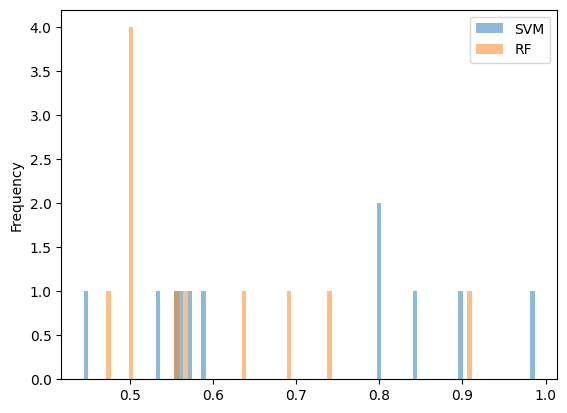

In [97]:
ax = results_all.plot.hist(bins=100, alpha=0.5)